In [2]:
import numpy as np
from functools import reduce
import math
from matplotlib import pyplot as plt

# Preprocessing

In [3]:
#vocab
vocab = None
with open("./hw4_vocab.txt",'r')as f:
    vocab = f.readlines()
for i in range(len(vocab)):
    vocab[i] = vocab[i][:-1]
#unigram
unigram = None
with open("./hw4_unigram.txt","r") as f:
    unigram = f.readlines()
for i in range(len(unigram)):
    unigram[i] = int(unigram[i][:-1])

#bigram
bigram = []
with open("./hw4_bigram.txt","r") as f:
    temp = f.readlines()
    for i in temp:
        bigram.append(i.split("\t"))
for i in range(len(bigram)):
    bigram[i][0] = int(bigram[i][0])
    bigram[i][1] = int(bigram[i][1])
    bigram[i][2] = int(bigram[i][2])

# Problem (a)

In [5]:
unig = np.zeros((len(unigram),))
for i in range(len(unigram)):
    unig[i] = int(unigram[i])
unig = unig/np.sum(unig)
print("{},{}".format("Word Starting With A","Prob"))
for i in range(len(vocab)):
    if vocab[i][0]=='A':
        print("{},{}".format(vocab[i][::],unig[i]))

Word Starting With A,Prob
A,0.018407244690712494
AND,0.017863233925020615
AT,0.004312974000612439
AS,0.003991797167406474
AN,0.002999256673943544
ARE,0.0029896926709136874
ABOUT,0.0019256178376532746
AFTER,0.0013465675979453587
ALSO,0.0013100115812493978
ALL,0.001181814804064031
A.,0.0010256109080316418
ANY,0.0006318601694814718
AMERICAN,0.0006120961939108219
AGAINST,0.000595964582662253
ANOTHER,0.0004283866165304179
AMONG,0.00037429251755208585
AGO,0.0003565709825261751
ACCORDING,0.0003475451075440342
AIR,0.00031100132103097604
ADMINISTRATION,0.0002915186396670866
AGENCY,0.0002796553622515356
AROUND,0.00027685465036683335
AGREEMENT,0.00026278994002880895
AVERAGE,0.00025907196442640943
ASKED,0.00025822808180612795
ALREADY,0.0002490799049949608
AREA,0.0002310893059451922
ANALYSTS,0.00022603824040640604
ANNOUNCED,0.00022715118705054536
ADDED,0.00022121954834276986
ALTHOUGH,0.00021426057427117345
AGREED,0.00021177784714193957
APRIL,0.00020669009105444552
AWAY,0.00020205485173434878


# Problem (b)

In [6]:
prob = []
index_the = 0
#find "The" index
for i in range(len(vocab)):
    if(vocab[i]=="THE"):
        index_the = i
        break
#The Bigram
bigram_the = []
for i in range(len(bigram)):
    if(bigram[i][0]==(index_the+1)):
        bigram_the.append(bigram[i])

#calculate the ML prob
prob_the_w = np.zeros((len(vocab),))
for i in range(len(bigram_the)):
    w_index = bigram_the[i][1] -1 
    count_the_w = bigram_the[i][2]
    prob_the_w[w_index] = count_the_w/unigram[index_the]
#search 5 max
max_prob = []
for i in range(prob_the_w.shape[0]):
    if(len(max_prob)<5):
        max_prob.append((i,prob_the_w[i]))
        max_prob = sorted(max_prob,key = lambda x: x[1])
    else:
        if(prob_the_w[i]>max_prob[0][1]):
            max_prob[0] = (i,prob_the_w[i])
            max_prob = sorted(max_prob,key = lambda x: x[1])
#print_out
for i in max_prob[::-1]:
    print("The {}\t\t{}".format(vocab[i[0]],i[1]))

The <UNK>		0.6150198100055118
The U.		0.013372499432610317
The FIRST		0.011720260675031612
The COMPANY		0.011658788055636611
The NEW		0.009451480076516552


# Problem (c)

In [7]:
index_last = vocab.index("LAST")
index_week = vocab.index("WEEK")
index_stock = vocab.index("STOCK")
index_market = vocab.index("MARKET")
index_fell = vocab.index("FELL")
index_by = vocab.index("BY")
index_one = vocab.index("ONE")
index_hundred = vocab.index("HUNDRED")
index_points = vocab.index("POINTS")
index_s = vocab.index("<s>")
product_unig = reduce((lambda x, y: x * y), [unig[index_last],unig[index_week],unig[index_the],unig[index_stock],
                                        unig[index_market],unig[index_fell],unig[index_by],unig[index_one],
                                       unig[index_hundred],unig[index_points]])
log_likelihoods_uni = math.log(product_unig)
print("Log-likelihoods of this sentence under unigram model: {}".format(log_likelihoods_uni))

bi_mat = np.zeros((len(vocab),len(vocab)))
for i in range(len(bigram)):
    x = bigram[i][0] - 1
    y = bigram[i][1] - 1
    bi_mat[x,y] = bigram[i][2]

P_last_s = bi_mat[index_s,index_last]/unigram[index_s]
P_week_last = bi_mat[index_last,index_week]/unigram[index_last]
P_the_week = bi_mat[index_week,index_the]/unigram[index_week]
P_stock_the = bi_mat[index_the,index_stock]/unigram[index_the]
P_market_stock = bi_mat[index_stock,index_market]/unigram[index_stock]
P_fell_market = bi_mat[index_market,index_fell]/unigram[index_market]
P_by_fell = bi_mat[index_fell,index_by]/unigram[index_fell]
P_one_by = bi_mat[index_by,index_one]/unigram[index_by]
P_hundred_one = bi_mat[index_one,index_hundred]/unigram[index_one]
P_points_hundred = bi_mat[index_hundred,index_points]/unigram[index_hundred]
product_bigr = reduce((lambda x, y: x * y), [P_last_s,P_week_last,P_the_week,P_stock_the,P_market_stock,
                                            P_fell_market,P_by_fell,P_one_by,P_hundred_one,P_points_hundred])
log_likelihoods_bigr = math.log(product_bigr)
print("Log-likelihoods of this sentence under bigram model: {}".format(log_likelihoods_bigr))

Log-likelihoods of this sentence under unigram model: -64.50944034364878
Log-likelihoods of this sentence under bigram model: -44.740469213403735


# Problem (d)

In [8]:
"The nineteen officials sold fire insurance"
index_nineteen = vocab.index("NINETEEN")
index_officials = vocab.index("OFFICIALS")
index_sold = vocab.index("SOLD")
index_fire = vocab.index("FIRE")
index_insurance = vocab.index("INSURANCE")
product_d_unig = reduce((lambda x,y:x*y),[unig[index_the],unig[index_nineteen],unig[index_officials],unig[index_sold],unig[index_fire],unig[index_insurance]])
print("Log-likelihoods of this sentence under unigram model: {}".format(math.log(product_d_unig)))

P_the_s = bi_mat[index_s,index_the]/unigram[index_s]
P_nineteen_the = bi_mat[index_the,index_nineteen]/unigram[index_the]
P_officials_nineteen = bi_mat[index_nineteen,index_officials]/unigram[index_nineteen]
P_sold_officials = bi_mat[index_officials,index_sold]/unigram[index_officials]
P_fire_sold = bi_mat[index_sold,index_fire]/unigram[index_sold]
P_insurance_fire = bi_mat[index_fire,index_insurance]/unigram[index_fire]
product_d_bigr = reduce((lambda x, y: x * y), [P_the_s,P_nineteen_the,P_officials_nineteen,P_sold_officials,
                                              P_fire_sold,P_insurance_fire])
print([P_the_s,P_nineteen_the,P_officials_nineteen,P_sold_officials,
                                              P_fire_sold,P_insurance_fire])
print("Log-likelihoods of this sentence under bigram model: {}".format(math.log(product_d_bigr)))

Log-likelihoods of this sentence under unigram model: -41.64345971649364
[0.15865263383617936, 0.006650714911000876, 0.0, 9.162207725573554e-05, 0.0, 0.003052399525182296]


ValueError: math domain error

# Problem (e)

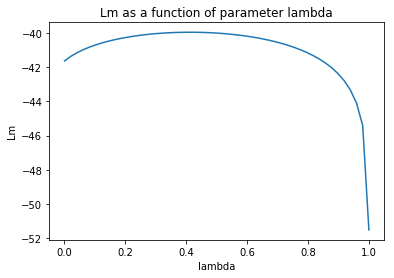

Max Lm:-39.953751575277174, where alpha=0.4083469387755102


In [9]:
alphas = np.linspace(0.001,0.999)
res = []
max_tuple = (1,-float('Inf'))
for alpha in alphas:
    Pm_the_s = unig[index_the]*(1-alpha)+P_the_s*alpha
    Pm_nineteen_the = unig[index_nineteen]*(1-alpha)+P_nineteen_the*alpha
    Pm_officials_nineteen = unig[index_officials]*(1-alpha)+P_officials_nineteen*alpha
    Pm_sold_officials = unig[index_sold]*(1-alpha)+P_sold_officials*alpha
    Pm_fire_sold = unig[index_fire]*(1-alpha)+P_fire_sold*alpha
    Pm_insurance_fire = unig[index_insurance]*(1-alpha)+P_insurance_fire*alpha
    prod_alpha = reduce((lambda x,y:x*y),[Pm_the_s,Pm_nineteen_the,Pm_officials_nineteen,Pm_sold_officials,
                                     Pm_fire_sold,Pm_insurance_fire])
    res.append(math.log(prod_alpha))
    if(math.log(prod_alpha)>max_tuple[1]):
        max_tuple = (alpha,math.log(prod_alpha))
    
plt.title("Lm as a function of parameter lambda")
plt.plot(alphas,res)
plt.xlabel("lambda")
plt.ylabel("Lm")
plt.show()
print("Max Lm:{}, where alpha={}".format(max_tuple[1],max_tuple[0]))